<a href="https://colab.research.google.com/github/chinmayc0707/genai/blob/main/Program_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install gensim scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requ

In [1]:
# Import libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300") # Load Word2Vec model

Loading pre-trained word vectors...
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
# Select 10 words from a specific domain (e.g., technology)
domain_words = ["computer", "software", "hardware", "algorithm", "data", "network",
"programming", "machine", "learning", "artificial"]

In [5]:
# Get vectors for the selected words
domain_vectors = np.array([word_vectors[word] for word in domain_words])

In [11]:
# Function to visualize word embeddings using PCA or t-SNE
def visualize_word_embeddings(words, vectors, method='pca', perplexity=5):
 # Reduce dimensionality to 2D
 if method == 'pca':
  reducer = PCA(n_components=2)
 elif method == 'tsne':
  reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity)
 else:
  raise ValueError("Method must be 'pca' or 'tsne'.")
 reduced_vectors = reducer.fit_transform(vectors)
 # Plot the results
 plt.figure(figsize=(10, 8))
 for i, word in enumerate(words):
  plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o', color='blue')
  plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

 plt.title(f"Word Embeddings Visualization using {method.upper()}")
 plt.xlabel("Component 1")
 plt.ylabel("Component 2")
 plt.grid(True)
 plt.show()

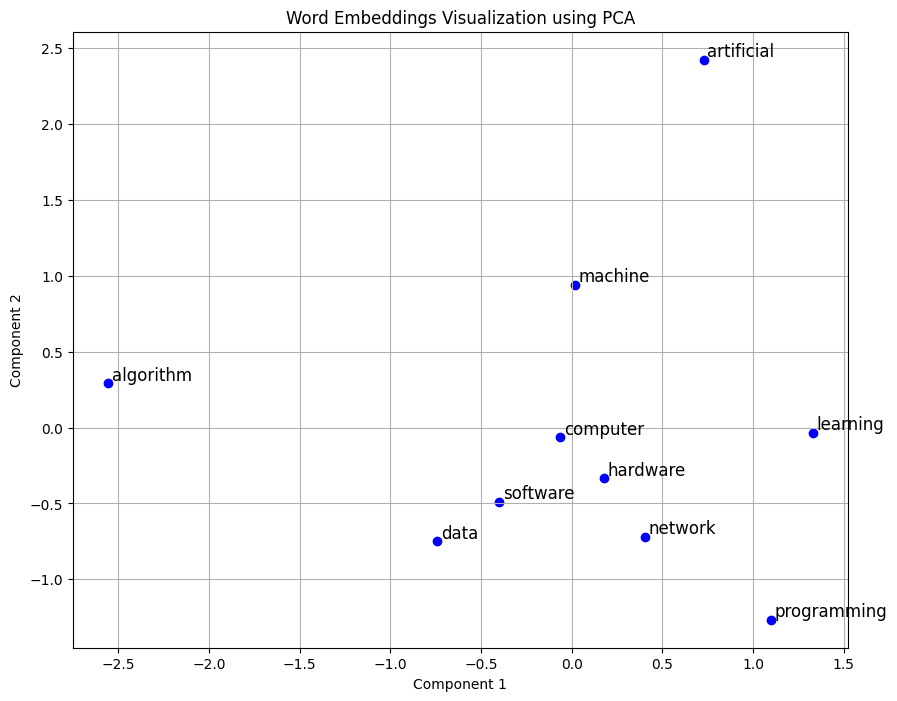

In [12]:
# Visualize using PCA
visualize_word_embeddings(domain_words, domain_vectors, method='pca')

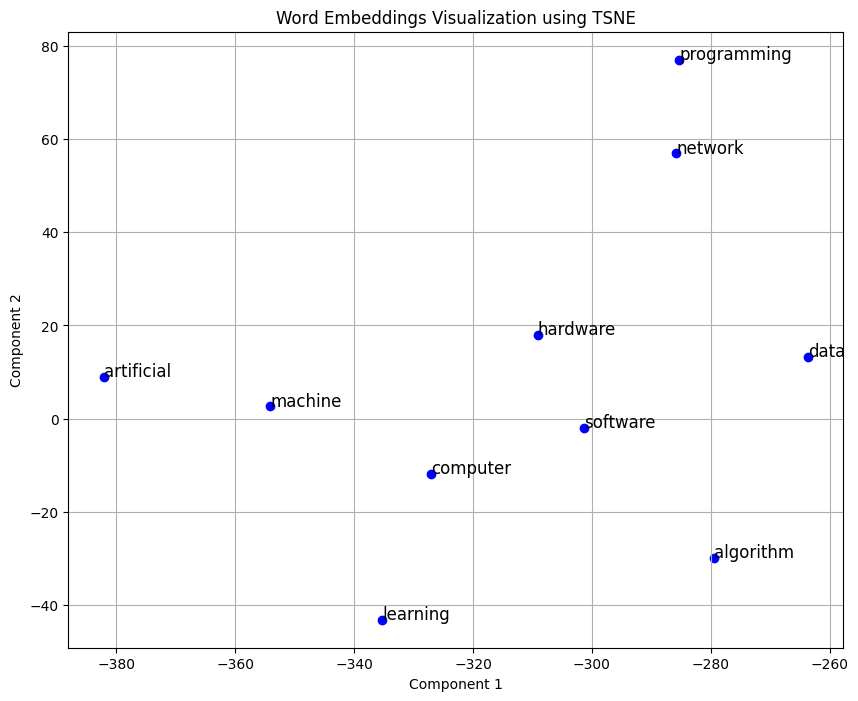

In [13]:
# Visualize using t-SNE
visualize_word_embeddings(domain_words, domain_vectors, method='tsne', perplexity=3)

In [14]:
# Function to generate 5 semantically similar words
def generate_similar_words(word):
  try:
    similar_words = word_vectors.most_similar(word, topn=5)
    print(f"\nTop 5 semantically similar words to '{word}':")
    for similar_word, similarity in similar_words:
      print(f"{similar_word}: {similarity:.4f}")
  except KeyError as e:
    print(f"Error: {e} not found in the vocabulary.")

In [15]:
# Example: Generate similar words for a given input
generate_similar_words("computer")
generate_similar_words("learning")


Top 5 semantically similar words to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082

Top 5 semantically similar words to 'learning':
teaching: 0.6602
learn: 0.6365
Learning: 0.6208
reteaching: 0.5810
learner_centered: 0.5739
